In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [9]:
# Load sentiment data
sentiment = pd.read_csv("fear_greed_index.csv")

# Load trader data
trader = pd.read_csv("historical_data.csv")

# Check shape
print("Sentiment Shape:", sentiment.shape)
print("Trader Shape:", trader.shape)

sentiment.head()
trader.head()

Sentiment Shape: (2644, 4)
Trader Shape: (211224, 16)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [10]:
print("Sentiment Missing Values:\n", sentiment.isnull().sum())
print("Trader Missing Values:\n", trader.isnull().sum())

print("Sentiment Duplicates:", sentiment.duplicated().sum())
print("Trader Duplicates:", trader.duplicated().sum())

Sentiment Missing Values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64
Trader Missing Values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64
Sentiment Duplicates: 0
Trader Duplicates: 0


In [11]:
# Convert sentiment date
sentiment.columns = sentiment.columns.str.strip()
sentiment['date'] = pd.to_datetime(sentiment['date'])

# Convert trader timestamp
trader['Timestamp IST'] = pd.to_datetime(trader['Timestamp IST'], dayfirst=True)

# Create daily date column
trader['date'] = trader['Timestamp IST'].dt.date
sentiment['date'] = sentiment['date'].dt.date

In [12]:
merged = pd.merge(trader, sentiment, on='date', how='left')

merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [13]:
daily_pnl = merged.groupby(['Account','date'])['Closed PnL'].sum().reset_index()
daily_pnl.head()

,Account,date,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


In [34]:
merged['win'] = np.where(merged['Closed PnL'] > 0, 1, 0)

win_rate = merged.groupby('Account')['win'].mean().reset_index()
win_rate.rename(columns={'win':'win_rate'}, inplace=True)
win_rate.head()

,Account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


In [15]:
merged = pd.merge(trader, sentiment, on='date', how='left')

merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [16]:
avg_size = merged.groupby('Account')['Size Tokens'].mean().reset_index()

avg_size.rename(columns={'Size Tokens':'avg_trade_size'}, inplace=True)

avg_size.head()

,Account,avg_trade_size
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16.167205
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,503.067911
2,0x271b280974205ca63b716753467d5a371de622ab,190.601402
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,2073.877613
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,27144.277189


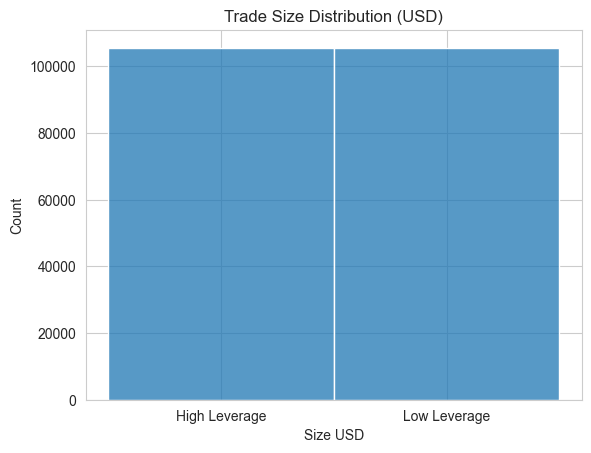

In [46]:
sns.histplot(merged['Size USD'], bins=30)
plt.title("Trade Size Distribution (USD)")
plt.savefig("trade_size_distribution.png")
plt.show()

In [19]:
median_size = merged['Size USD'].median()

merged['risk_type'] = merged['Size USD'].apply(
    lambda x: "High Risk" if x > median_size else "Low Risk"
)

merged.groupby('risk_type')['Closed PnL'].mean()

risk_type
High Risk    93.116556
Low Risk      4.381445
Name: Closed PnL, dtype: float64

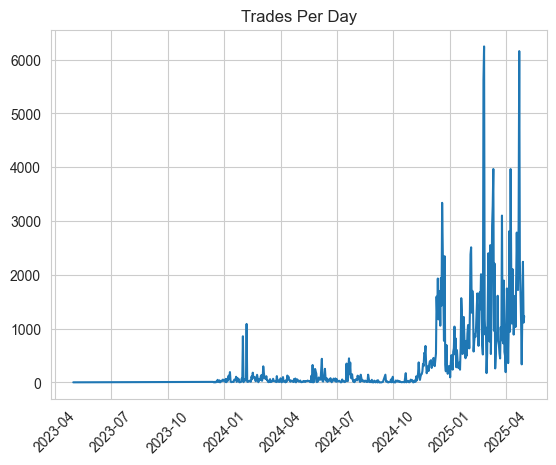

In [47]:
trades_per_day = merged.groupby('date').size().reset_index(name='trade_count')

plt.figure()
plt.plot(trades_per_day['date'], trades_per_day['trade_count'])
plt.xticks(rotation=45)
plt.title("Trades Per Day")
plt.savefig("Trades Per Day.png")
plt.show()

In [23]:
long_short = merged['Side'].value_counts(normalize=True)
print(long_short)

Side
SELL    0.513805
BUY     0.486195
Name: proportion, dtype: float64


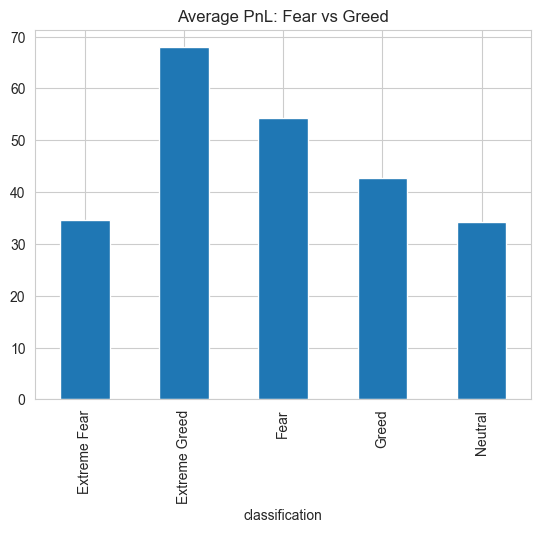

In [57]:
fear_greed_pnl = merged.groupby('classification')['Closed PnL'].mean()

fear_greed_pnl.plot(kind='bar')
plt.title("Average PnL: Fear vs Greed")
plt.savefig("Average PnL: Fear vs Greed.png")
plt.show()

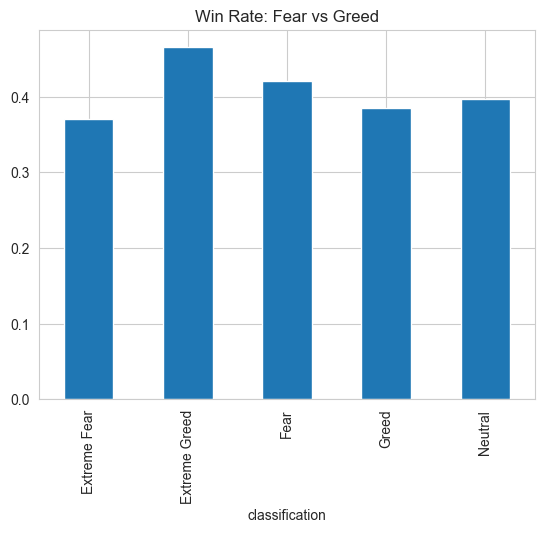

In [58]:
fear_greed_win = merged.groupby('classification')['win'].mean()

fear_greed_win.plot(kind='bar')
plt.title("Win Rate: Fear vs Greed")
plt.savefig("Win Rate: Fear vs Greed.png")
plt.show()

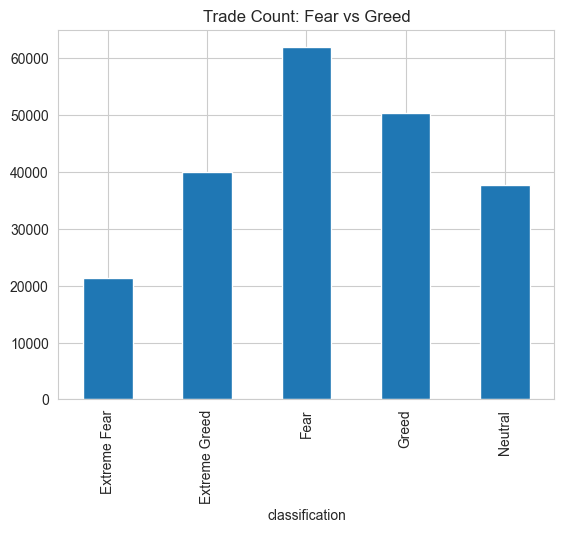

In [59]:
trade_freq = merged.groupby('classification').size()

trade_freq.plot(kind='bar')
plt.title("Trade Count: Fear vs Greed")
plt.savefig("Trade Count: Fear vs Greed.png")
plt.show()

In [39]:
merged['Size USD'] = np.where(merged['Size USD'] > merged['Size USD'].median(),
                                   "High Leverage","Low Leverage")

merged.groupby('Size USD')['Closed PnL'].mean()

Size USD
High Leverage    93.116556
Low Leverage      4.381445
Name: Closed PnL, dtype: float64

In [41]:
trade_counts = merged['Account'].value_counts()

threshold = trade_counts.median()

merged['trader_type'] = merged['Account'].map(
    lambda x: "Frequent" if trade_counts[x] > threshold else "Infrequent"
)

merged.groupby('trader_type')['Closed PnL'].mean()

trader_type
Frequent      42.493421
Infrequent    96.943024
Name: Closed PnL, dtype: float64

In [43]:
performance = merged.groupby('Account')['Closed PnL'].mean()

merged['winner_type'] = merged['Account'].map(
    lambda x: "Consistent Winner" if performance[x] > 0 else "Inconsistent"
)

merged.groupby('winner_type')['Closed PnL'].mean()

winner_type
Consistent Winner    52.308278
Inconsistent        -29.188175
Name: Closed PnL, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create target
merged['profit_bucket'] = np.where(merged['Closed PnL'] > 0, 1, 0)

# Automatically select only numeric columns
numeric_features = merged.select_dtypes(include=['int64','float64'])

# Remove target from features
features = numeric_features.drop(columns=['profit_bucket','Closed PnL'], errors='ignore')

target = merged['profit_bucket']

# Fill missing value
features = features.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))

Accuracy: 1.0


In [60]:
import os
print(os.getcwd())

C:\Users\HP
